In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics
import sklearn.model_selection

In [3]:
def to_lower_word(row):
    return row.Word.lower()

In [4]:
df_test = pd.read_csv("./data/test.csv", encoding="utf-8")
print df_test.shape

(188920, 1)


In [5]:
df_train = pd.read_csv("./data/train.csv", encoding="utf-8")
print df_train.shape

(101408, 2)


In [6]:
df_train["word_lower"] = df_train.apply(to_lower_word, axis=1)
df_test["word_lower"] = df_test.apply(to_lower_word, axis=1)

In [7]:
df_train.head()

,Word,Label,word_lower
0,Аалтонен,1,аалтонен
1,Аар,0,аар
2,Аарон,0,аарон
3,ААРОН,0,аарон
4,Аарона,0,аарона


In [8]:
import sklearn

In [9]:
#vc = df_train.Word.value_counts()
vc = df_train.word_lower.value_counts()

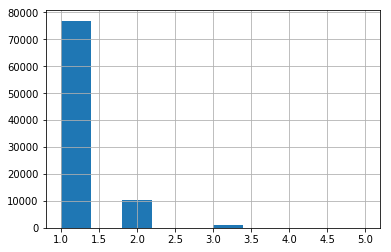

In [10]:
vc.hist()

In [11]:
#vc2 = df_test.Word.value_counts()
vc2 = df_test.word_lower.value_counts()

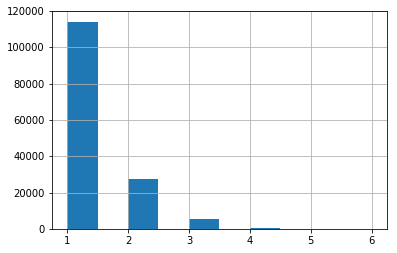

In [12]:
vc2.hist()

In [13]:
# Некоторое количество слов 2 раза встречаются, 
# а после приведения к нижнему регистру и того меньше

In [14]:
#все буквы
def get_unigrams(series):
    unigrams = set([])
    for word in set(series):
        unigrams.update(word)
    return unigrams

alphabet_train = get_unigrams(df_train.word_lower) 
alphabet_test = get_unigrams(df_test.word_lower) 

In [15]:
print len(alphabet_train)
print len(alphabet_test)
print len(alphabet_test.intersection(alphabet_train))
print len(alphabet_test.symmetric_difference(alphabet_train))

50
57
46
15


In [16]:
print "Different characters:"
for i, char in enumerate(alphabet_test.symmetric_difference(alphabet_train), 1):
    print i, char

Different characters:
1 ”
2  
3 "
4 &
5 0
6 1
7 4
8  
9 ѐ
10 \
11 á
12 `
13 ë
14 ·
15 ô


In [17]:
print "Same characters:"
for i, char in enumerate(sorted(alphabet_test.intersection(alphabet_train)), 1):
    print i, char

Same characters:
1 '
2 -
3 .
4 /
5 2
6 3
7 7
8 «
9 »
10 é
11 ó
12 а
13 б
14 в
15 г
16 д
17 е
18 ж
19 з
20 и
21 й
22 к
23 л
24 м
25 н
26 о
27 п
28 р
29 с
30 т
31 у
32 ф
33 х
34 ц
35 ч
36 ш
37 щ
38 ъ
39 ы
40 ь
41 э
42 ю
43 я
44 ё
45 ’
46 “


In [18]:
same_chars = sorted(alphabet_test.intersection(alphabet_train))

In [19]:
# фактор has_char_n

for n, char in enumerate(same_chars, 1):
    name = "char_{}".format(n)
    def has_char_in_word_lower(row):
        return char in row.word_lower
    df_train[name] = df_train.apply(has_char_in_word_lower, axis=1)
    df_test[name] = df_test.apply(has_char_in_word_lower, axis=1)


In [20]:
for n, char in enumerate(same_chars, 1):
    name = "char_{}".format(n)
    #print name, char
    #print df_train[name].value_counts()
    #print 


In [21]:
#df_train[df_train["char_46"]]

In [22]:
def get_word_lower_len(row):
    return len(row.word_lower.strip())
df_train["word_lower_len"] = df_train.apply(get_word_lower_len, axis=1)
df_test["word_lower_len"] = df_test.apply(get_word_lower_len, axis=1)

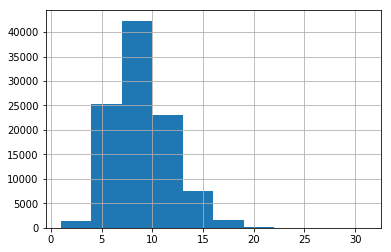

In [23]:
df_train["word_lower_len"].hist()

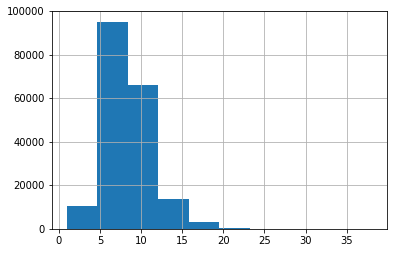

In [24]:
df_test["word_lower_len"].hist()

In [25]:
only_cyrilic_set = set(u"абвгдеёжзийклмнопрстуфхцчшщъыьэюя")
def contain_only_cyrilic_letters(row):
    chars = set()
    chars.update(row.word_lower)
    return len(chars.difference(only_cyrilic_set)) == 0
df_train["only_cyrilic_chars"] = df_train.apply(contain_only_cyrilic_letters, axis=1)
df_test["only_cyrilic_chars"] = df_test.apply(contain_only_cyrilic_letters, axis=1)

In [26]:
vowels_set = set(u"аеёиоуыэюя")
consonants_set = only_cyrilic_set.difference(vowels_set)
def n_vowels(row):
    n = 0
    for char in row.word_lower:
        if char in vowels_set:
            n += 1
    return n

df_train["n_vowels"] = df_train.apply(n_vowels, axis=1)
df_test["n_vowels"] = df_test.apply(n_vowels, axis=1)

def n_consonants(row):
    n = 0
    for char in row.word_lower:
        if char in consonants_set:
            n += 1
    return n

df_train["n_consonants"] = df_train.apply(n_vowels, axis=1)
df_test["n_consonants"] = df_test.apply(n_vowels, axis=1)

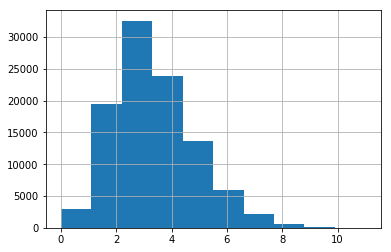

In [27]:
df_train.n_consonants.hist()

In [28]:
row = df_train.iloc[0,:]
row.word_lower[-2:]

u'\u0435\u043d'

In [29]:
def get_ending_2(row):
    return row.word_lower.strip()[-2:].encode("utf-8")

df_train["ending_2"] = df_train.apply(get_ending_2, axis=1)
df_test["ending_2"] = df_test.apply(get_ending_2, axis=1)

In [30]:
def get_ending_3(row):
    return row.word_lower.strip()[-3:].encode("utf-8")

df_train["ending_3"] = df_train.apply(get_ending_3, axis=1)
df_test["ending_3"] = df_test.apply(get_ending_3, axis=1)

In [31]:
def start_1(row):
    return row.Word.strip()[0].encode("utf-8")

df_train["start_1"] = df_train.apply(start_1, axis=1)
df_test["start_1"] = df_test.apply(start_1, axis=1)

In [32]:
def start_2(row):
    return row.Word.strip()[0:2].encode("utf-8")

df_train["start_2"] = df_train.apply(start_2, axis=1)
df_test["start_2"] = df_test.apply(start_2, axis=1)

### Моделирование

In [33]:
from catboost import CatBoostClassifier

In [34]:
feature_columns = sorted(set(df_train.columns).difference({"Word", "word_lower", "Label"}))


In [35]:
#train_data = df_train.loc[:, feature_columns].values
#train_label = df_train.Label.values

train_data, test_data, train_label, test_label = sklearn.model_selection.train_test_split(
df_train.loc[:, feature_columns].values, df_train.Label.values, 
    test_size=0.3, random_state=0)

In [36]:
#list(train_data[0,:])

In [37]:
model = CatBoostClassifier(iterations=400, depth=12, loss_function='Logloss')#, logging_level='Verbose')
#train the model
model.fit(train_data, train_label,cat_features = [
    feature_columns.index("ending_2"),
    feature_columns.index("ending_3"),
    feature_columns.index("start_1"),
    feature_columns.index("start_2"),
],
    eval_set = (test_data, test_label)
)

0:	learn: 0.6512891	test: 0.6511209	best: 0.6511209 (0)	total: 141ms	remaining: 56.2s
1:	learn: 0.6137889	test: 0.6132835	best: 0.6132835 (1)	total: 209ms	remaining: 41.7s
2:	learn: 0.5794028	test: 0.5788827	best: 0.5788827 (2)	total: 293ms	remaining: 38.8s
3:	learn: 0.5483294	test: 0.5478350	best: 0.5478350 (3)	total: 380ms	remaining: 37.6s
4:	learn: 0.5206262	test: 0.5203433	best: 0.5203433 (4)	total: 461ms	remaining: 36.4s
5:	learn: 0.4955640	test: 0.4955341	best: 0.4955341 (5)	total: 535ms	remaining: 35.1s
6:	learn: 0.4724971	test: 0.4725128	best: 0.4725128 (6)	total: 623ms	remaining: 35s
7:	learn: 0.4513126	test: 0.4516285	best: 0.4516285 (7)	total: 707ms	remaining: 34.7s
8:	learn: 0.4323697	test: 0.4329647	best: 0.4329647 (8)	total: 791ms	remaining: 34.4s
9:	learn: 0.4148154	test: 0.4156274	best: 0.4156274 (9)	total: 875ms	remaining: 34.1s
10:	learn: 0.3992885	test: 0.4004771	best: 0.4004771 (10)	total: 962ms	remaining: 34s
11:	learn: 0.3847943	test: 0.3864188	best: 0.3864188 (11

96:	learn: 0.1823819	test: 0.2031986	best: 0.2031986 (96)	total: 8.17s	remaining: 25.5s
97:	learn: 0.1820704	test: 0.2031231	best: 0.2031231 (97)	total: 8.24s	remaining: 25.4s
98:	learn: 0.1818286	test: 0.2030375	best: 0.2030375 (98)	total: 8.34s	remaining: 25.4s
99:	learn: 0.1814523	test: 0.2028968	best: 0.2028968 (99)	total: 8.43s	remaining: 25.3s
100:	learn: 0.1811934	test: 0.2028412	best: 0.2028412 (100)	total: 8.51s	remaining: 25.2s
101:	learn: 0.1809095	test: 0.2027419	best: 0.2027419 (101)	total: 8.6s	remaining: 25.1s
102:	learn: 0.1806273	test: 0.2026493	best: 0.2026493 (102)	total: 8.7s	remaining: 25.1s
103:	learn: 0.1801596	test: 0.2025795	best: 0.2025795 (103)	total: 8.81s	remaining: 25.1s
104:	learn: 0.1797619	test: 0.2024223	best: 0.2024223 (104)	total: 8.92s	remaining: 25.1s
105:	learn: 0.1793779	test: 0.2023560	best: 0.2023560 (105)	total: 9.02s	remaining: 25s
106:	learn: 0.1790143	test: 0.2022881	best: 0.2022881 (106)	total: 9.12s	remaining: 25s
107:	learn: 0.1786021	te

190:	learn: 0.1567008	test: 0.1976977	best: 0.1976977 (190)	total: 17s	remaining: 18.6s
191:	learn: 0.1562498	test: 0.1976928	best: 0.1976928 (191)	total: 17.1s	remaining: 18.5s
192:	learn: 0.1559571	test: 0.1976225	best: 0.1976225 (192)	total: 17.2s	remaining: 18.4s
193:	learn: 0.1558283	test: 0.1976205	best: 0.1976205 (193)	total: 17.2s	remaining: 18.3s
194:	learn: 0.1556516	test: 0.1975835	best: 0.1975835 (194)	total: 17.3s	remaining: 18.2s
195:	learn: 0.1555067	test: 0.1975622	best: 0.1975622 (195)	total: 17.4s	remaining: 18.1s
196:	learn: 0.1553523	test: 0.1975358	best: 0.1975358 (196)	total: 17.5s	remaining: 18s
197:	learn: 0.1550533	test: 0.1974856	best: 0.1974856 (197)	total: 17.6s	remaining: 18s
198:	learn: 0.1547624	test: 0.1974126	best: 0.1974126 (198)	total: 17.7s	remaining: 17.9s
199:	learn: 0.1545546	test: 0.1973619	best: 0.1973619 (199)	total: 17.8s	remaining: 17.8s
200:	learn: 0.1543840	test: 0.1973206	best: 0.1973206 (200)	total: 17.9s	remaining: 17.7s
201:	learn: 0.15

284:	learn: 0.1369999	test: 0.1952494	best: 0.1952494 (284)	total: 25.8s	remaining: 10.4s
285:	learn: 0.1367565	test: 0.1951747	best: 0.1951747 (285)	total: 25.8s	remaining: 10.3s
286:	learn: 0.1366062	test: 0.1951547	best: 0.1951547 (286)	total: 25.9s	remaining: 10.2s
287:	learn: 0.1364566	test: 0.1951346	best: 0.1951346 (287)	total: 26s	remaining: 10.1s
288:	learn: 0.1363207	test: 0.1951390	best: 0.1951346 (287)	total: 26.1s	remaining: 10s
289:	learn: 0.1361738	test: 0.1951655	best: 0.1951346 (287)	total: 26.2s	remaining: 9.94s
290:	learn: 0.1358516	test: 0.1951253	best: 0.1951253 (290)	total: 26.3s	remaining: 9.84s
291:	learn: 0.1356674	test: 0.1950941	best: 0.1950941 (291)	total: 26.4s	remaining: 9.76s
292:	learn: 0.1355022	test: 0.1950823	best: 0.1950823 (292)	total: 26.5s	remaining: 9.66s
293:	learn: 0.1352634	test: 0.1950708	best: 0.1950708 (293)	total: 26.6s	remaining: 9.57s
294:	learn: 0.1351156	test: 0.1950553	best: 0.1950553 (294)	total: 26.7s	remaining: 9.49s
295:	learn: 0.

377:	learn: 0.1216893	test: 0.1939628	best: 0.1939570 (375)	total: 34.5s	remaining: 2.01s
378:	learn: 0.1215495	test: 0.1939657	best: 0.1939570 (375)	total: 34.6s	remaining: 1.92s
379:	learn: 0.1214156	test: 0.1939914	best: 0.1939570 (375)	total: 34.7s	remaining: 1.82s
380:	learn: 0.1212440	test: 0.1939849	best: 0.1939570 (375)	total: 34.8s	remaining: 1.73s
381:	learn: 0.1211436	test: 0.1939552	best: 0.1939552 (381)	total: 34.9s	remaining: 1.64s
382:	learn: 0.1209983	test: 0.1939129	best: 0.1939129 (382)	total: 35s	remaining: 1.55s
383:	learn: 0.1208517	test: 0.1939063	best: 0.1939063 (383)	total: 35.1s	remaining: 1.46s
384:	learn: 0.1207573	test: 0.1939079	best: 0.1939063 (383)	total: 35.2s	remaining: 1.37s
385:	learn: 0.1204792	test: 0.1938926	best: 0.1938926 (385)	total: 35.3s	remaining: 1.28s
386:	learn: 0.1203413	test: 0.1938693	best: 0.1938693 (386)	total: 35.4s	remaining: 1.19s
387:	learn: 0.1202456	test: 0.1938379	best: 0.1938379 (387)	total: 35.5s	remaining: 1.1s
388:	learn: 0

In [38]:
preds_proba = model.predict_proba(train_data)
preds_proba_test = model.predict_proba(test_data)


(array([   362.,    262.,    354.,    455.,    524.,    688.,    876.,
          1136.,   2237.,  23529.]),
 array([ 0.00346784,  0.10307578,  0.20268372,  0.30229165,  0.40189959,
         0.50150753,  0.60111546,  0.7007234 ,  0.80033134,  0.89993927,
         0.99954721]),
 <a list of 10 Patch objects>)

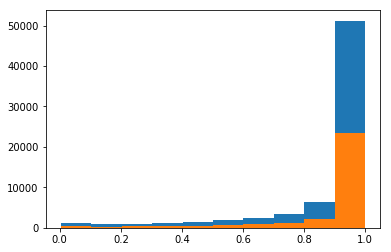

In [39]:
plt.hist(preds_proba[:,0])
plt.hist(preds_proba_test[:,0])

In [40]:
sklearn.metrics.roc_auc_score(
    y_true = train_label,
    y_score = preds_proba[:, 1], 
)

0.93527534369097742

In [41]:
sklearn.metrics.roc_auc_score(
    y_true = test_label,
    y_score = preds_proba_test[:, 1], 
)

0.9173244970213198

In [42]:
sklearn.metrics.roc_auc_score(
    y_true = test_label,
    y_score = preds_proba_test[:, 1], 
)

0.9173244970213198

In [43]:
# Переобучаем на всем множестве с подобранными гиперпараметрами


In [44]:
# делаем предсказание на тесте

In [45]:
preds_proba_submission = model.predict_proba(df_test.loc[:, feature_columns].values)

RangeIndex(start=0, stop=188920, step=1)

In [49]:
df_submission = pd.read_csv("./data/sample_submission.csv", encoding="utf-8")


In [51]:
df_submission.Prediction = preds_proba_submission[:,1]

In [52]:
df_submission.to_csv("hw_1_take_02.csv", index=False)

In [1]:
# вышло 0.91664